More datasets can be found at the [UCI website](http://archive.ics.uci.edu/ml/)

* Practice loading CSV files into Python using the [`CSV.reader()`](https://docs.python.org/2/library/csv.html) function in the standard library
* Practice loading CSV files using NumPy and the [`numpy.loadtxt()`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.loadtxt.html) function
* Practice loading CSV files using Pandas and the [`pandas.read_csv()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function

### Advanced seaborn
* http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/
* http://twiecki.github.io/blog/2014/11/18/python-for-data-science/

In [2]:
%matplotlib inline

In [3]:
# Load CSV using Pandas from URL
import matplotlib
import matplotlib.pyplot as plt
import pandas
from pandas.tools.plotting import scatter_matrix

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pandas.read_csv(url, names=names)

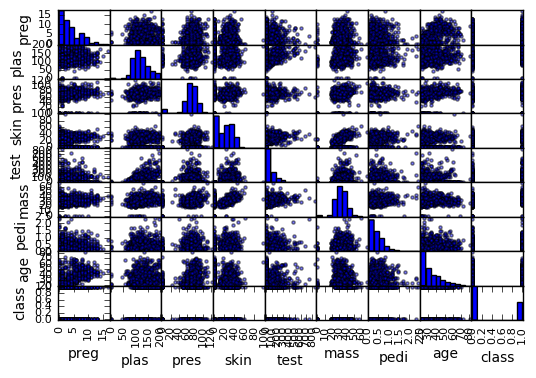

In [4]:
# use default plotting options
fig1 = scatter_matrix(df)

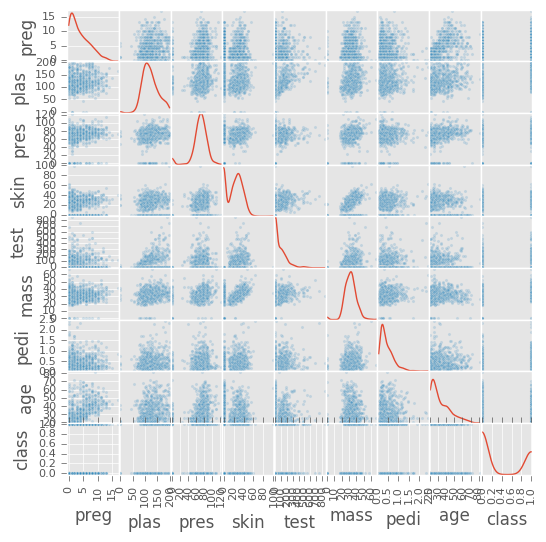

In [5]:
#  lets format the scatter plot to be a bit nicer
matplotlib.style.use('ggplot')
fig2 = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

C:\Miniconda3\envs\sandpit\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


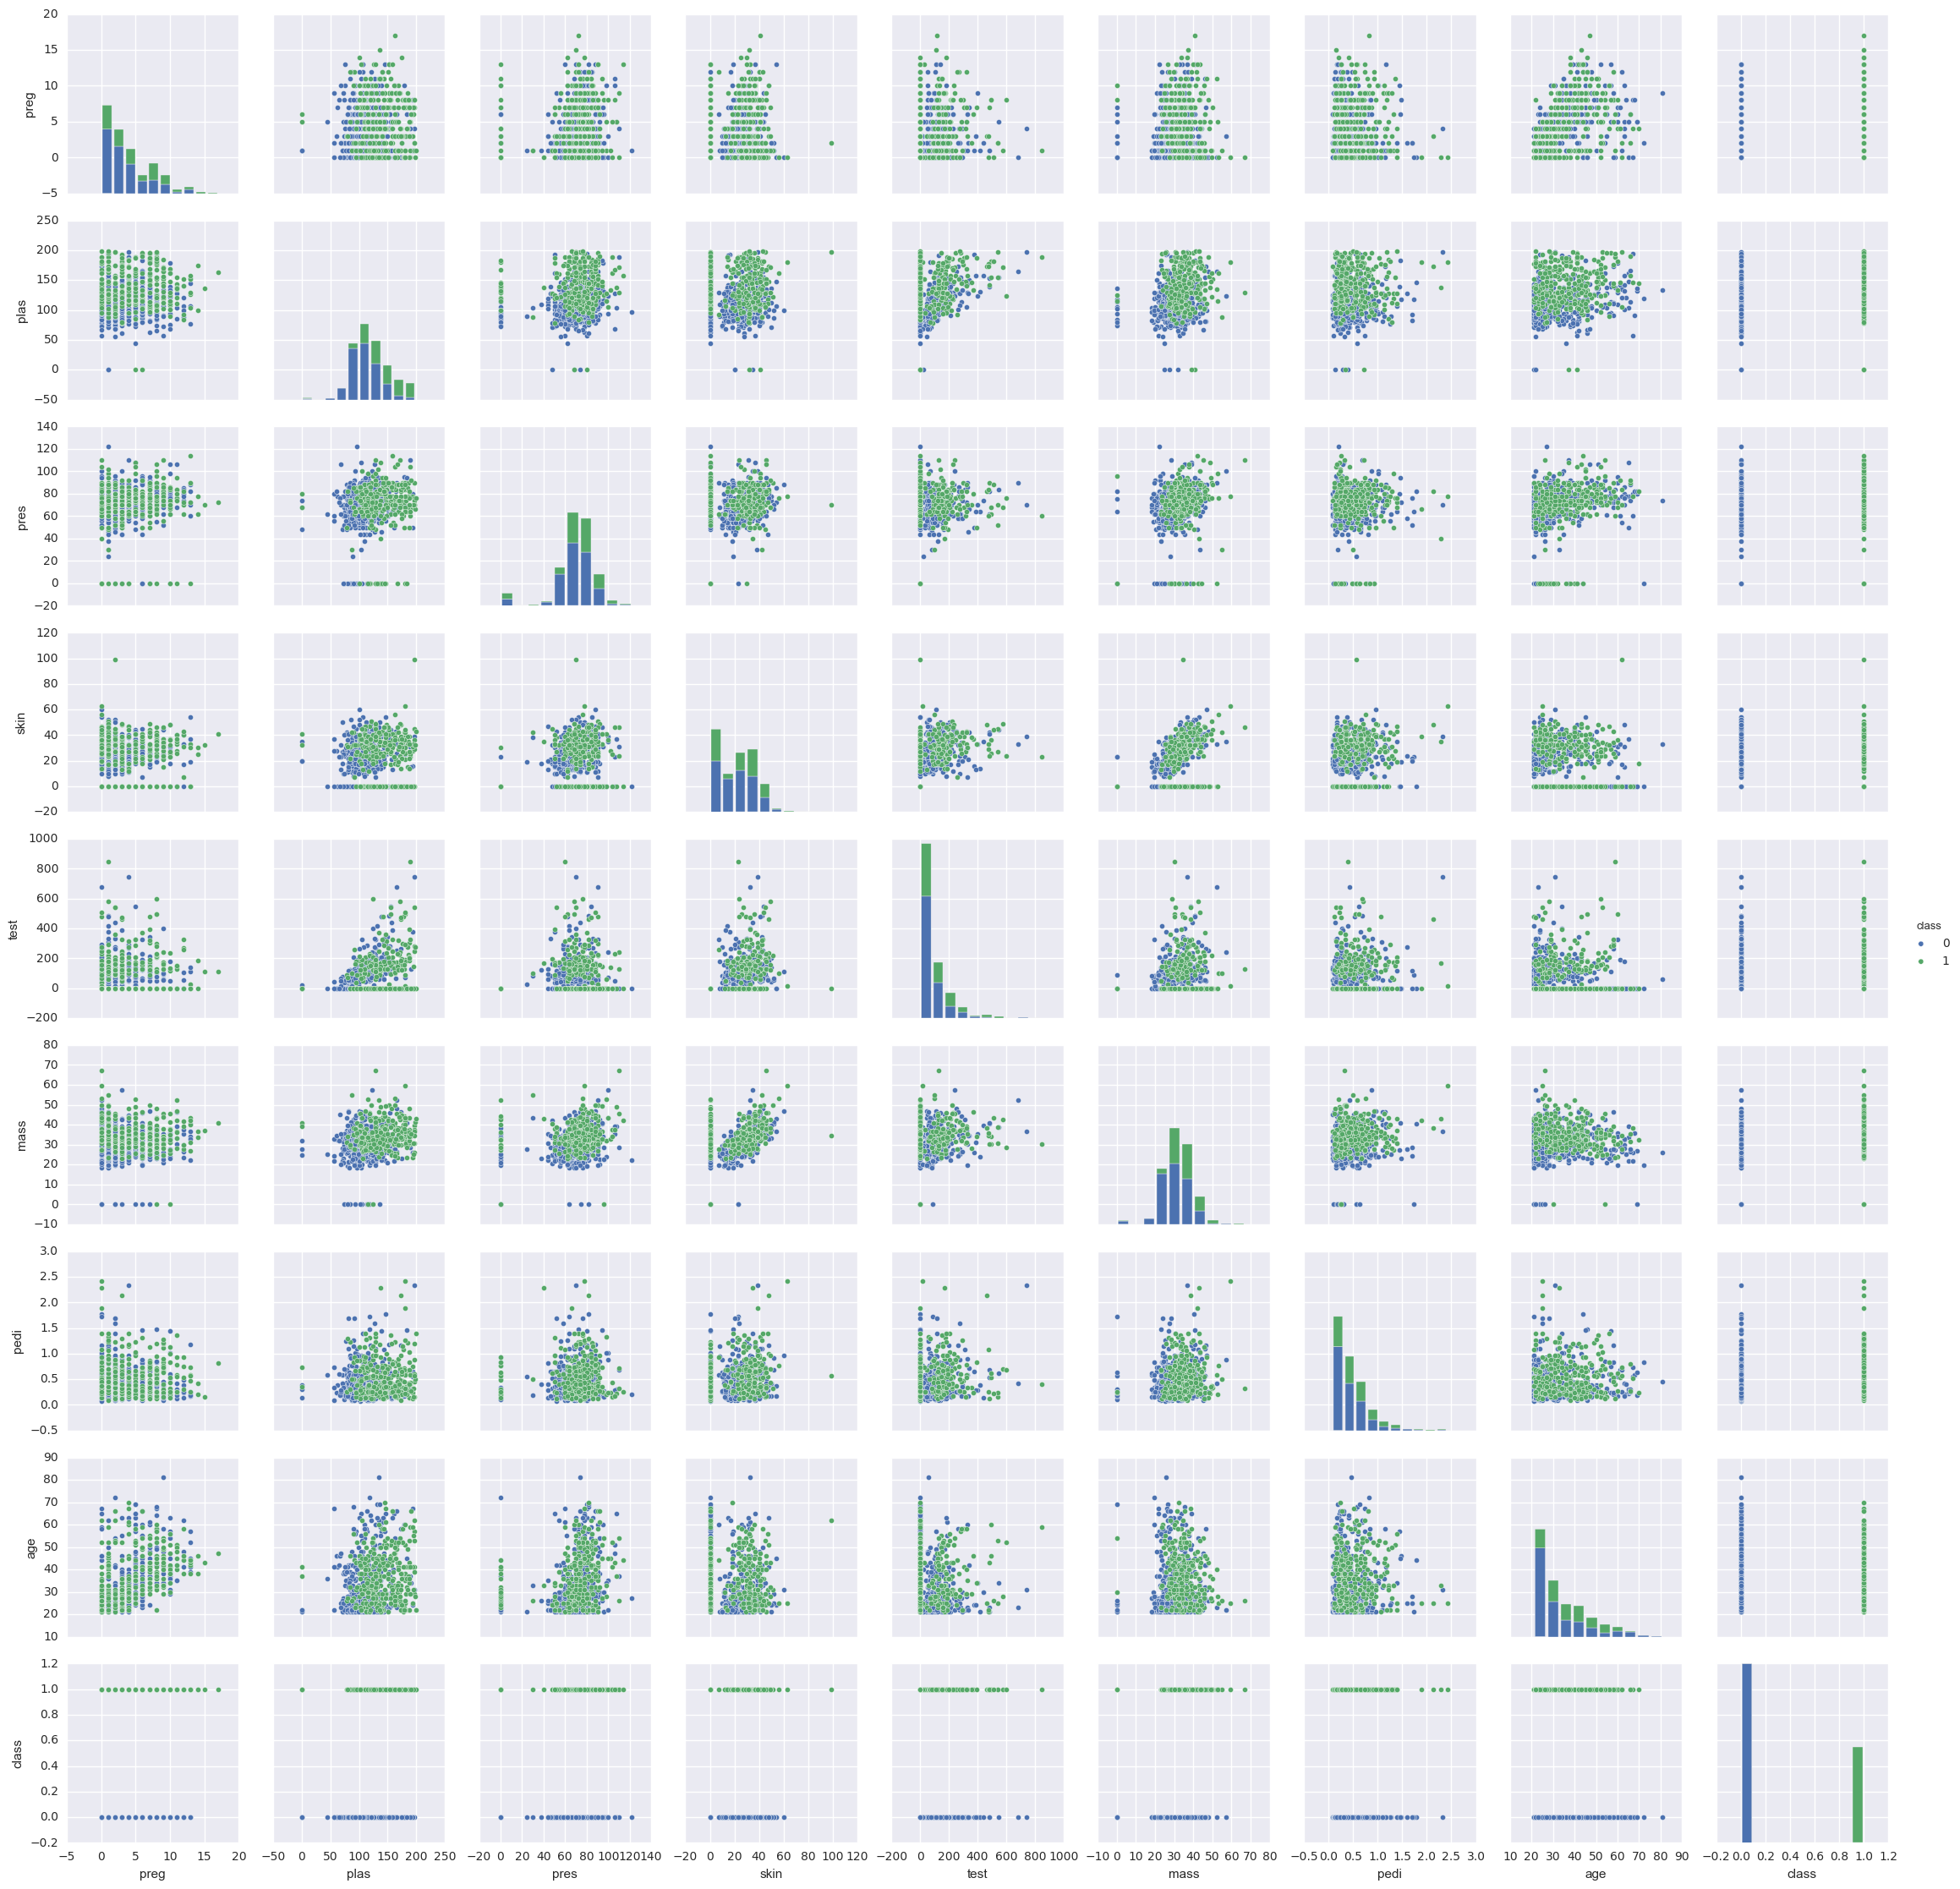

In [6]:
# another viz library
import seaborn as sns

fig3 = sns.pairplot(df, hue="class")

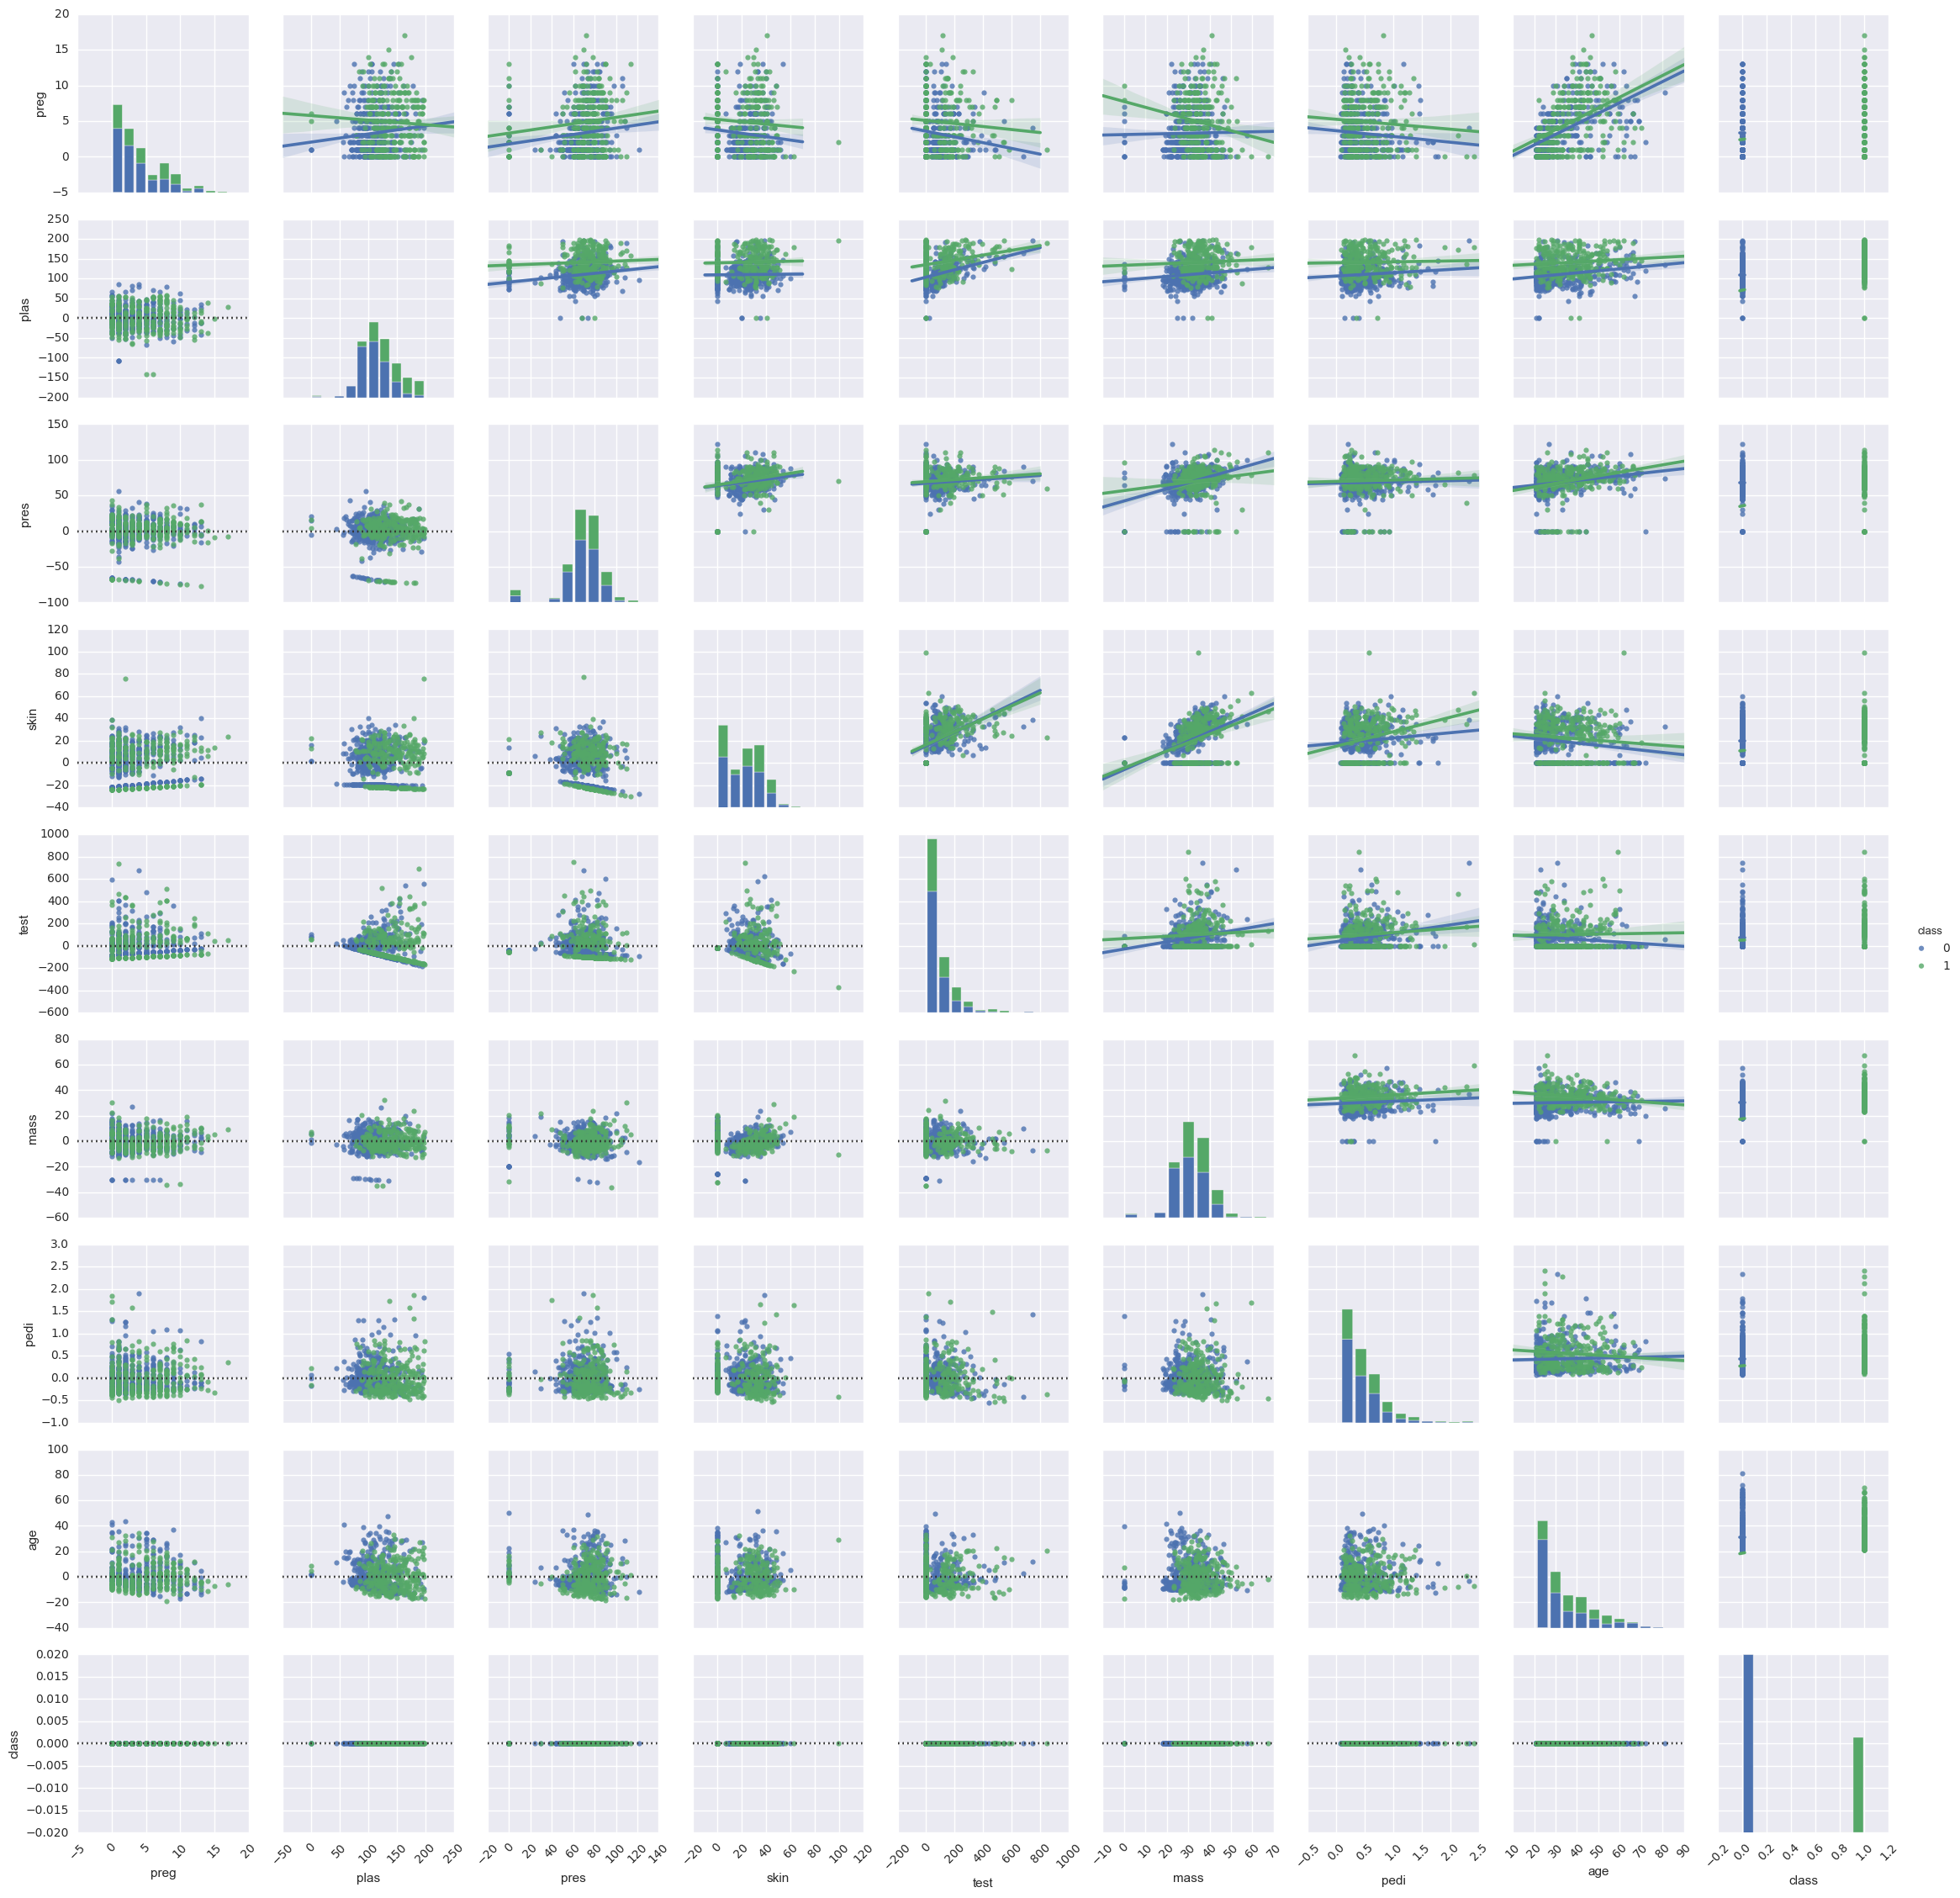

In [7]:
# lets do something more advanced with seaborn
fig4 = sns.PairGrid(df, hue="class")  
fig4.map_upper(sns.regplot)  
fig4.map_lower(sns.residplot)  
fig4.map_diag(plt.hist)

for ax in fig4.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
    
fig4.add_legend()  
fig4.set(alpha=0.5)

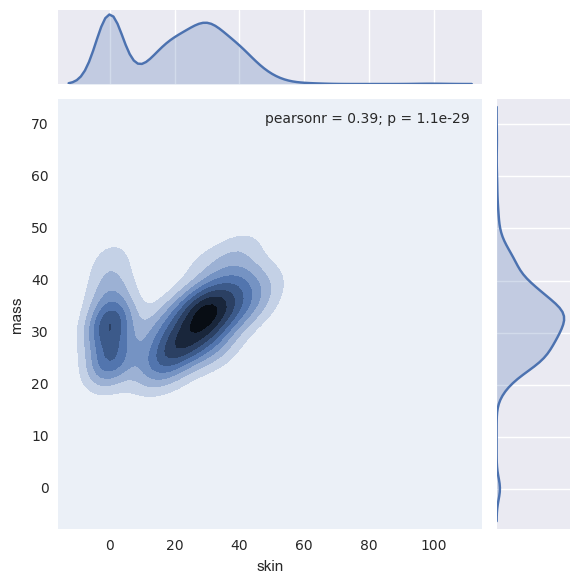

In [8]:
# lets view skin vs mass as there looks to be a linear relationship
fig5 = sns.jointplot("skin", "mass", data=df, kind='kde')

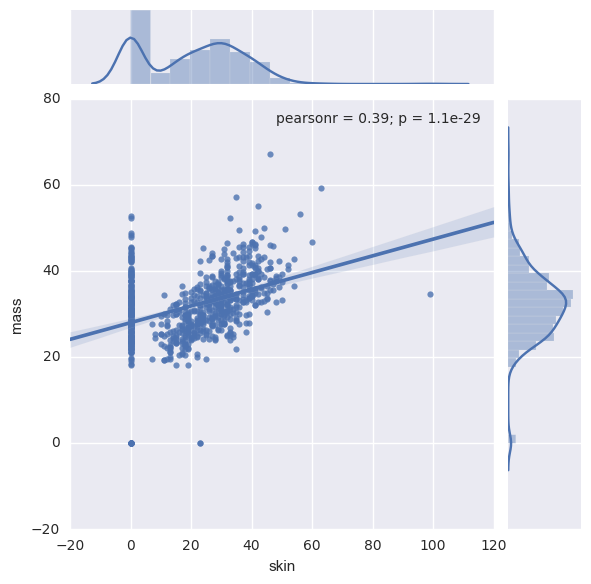

In [9]:
fig6 = sns.jointplot("skin", "mass", data=df, kind='reg')

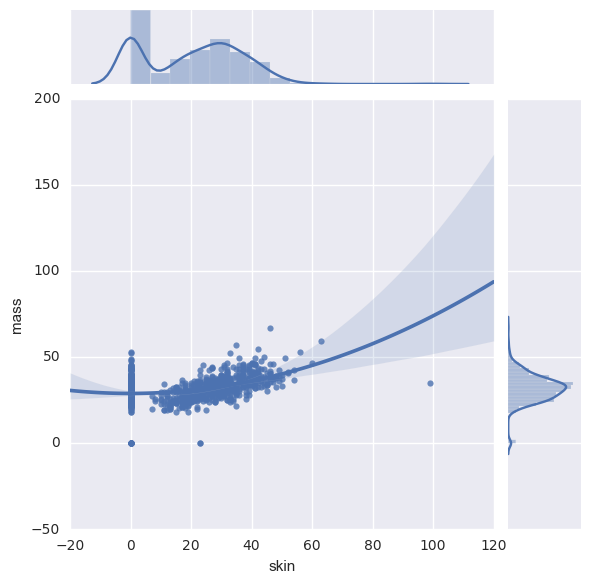

In [10]:
# the pearson and the shape would imply two seperate distributions
# lets investigate a little further with a 2nd order regression plot,
# note the slope of the line
fig7 = sns.JointGrid(x="skin", y="mass", data=df)  
fig7.plot_joint(sns.regplot, order=2)  
fig7.plot_marginals(sns.distplot)  

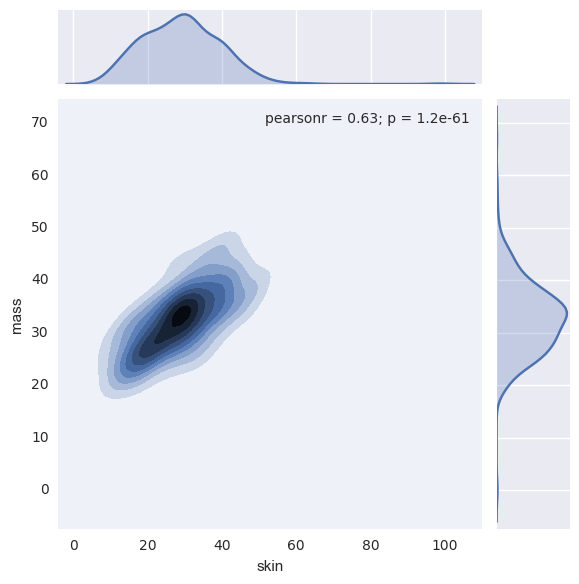

In [11]:
# lets filter the data frame and only keep the data where 'skin' is greater than 0
fig8 = sns.jointplot("skin", "mass", data=df[df['skin'] > 0], kind='kde')

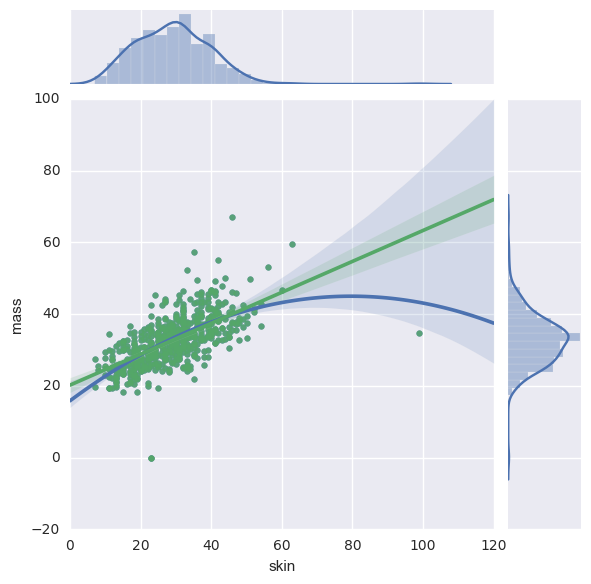

In [15]:
# lets isolate again and look at the regression plot
# again, note the slope of the lines, here we contrast
# a classic regression line with a 2nd order regression
fig9 = sns.JointGrid(x="skin", y="mass", data=df[df['skin'] > 0])  
fig9.plot_joint(sns.regplot, order=2)
fig9.plot_joint(sns.regplot)  
fig9.plot_marginals(sns.distplot)

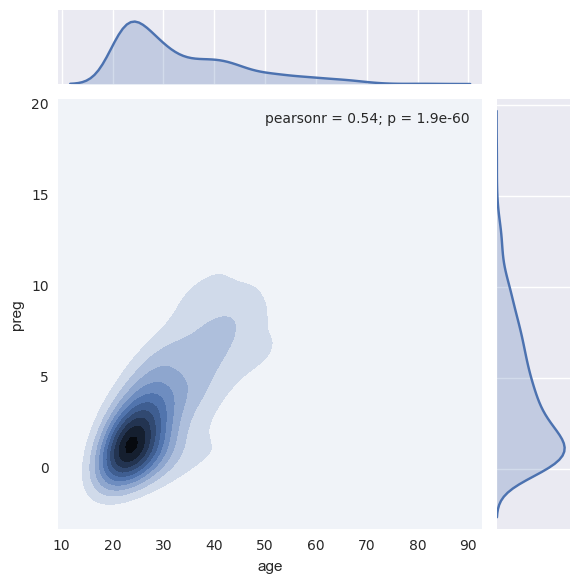

In [13]:
# lets try another: age vs preg
# lets view skin vs mass as there looks to be a linear relationship
fig10 = sns.jointplot("age", "preg", data=df, kind='kde')

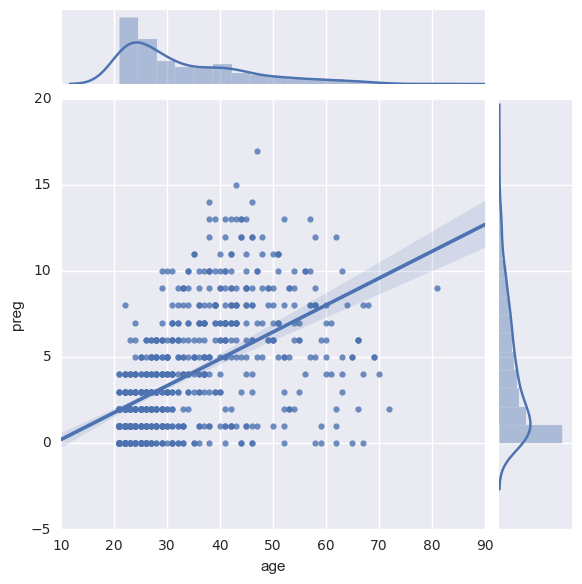

In [16]:
# lets isolate again and look at the regression plot
# again, note the slope of the line
fig11 = sns.JointGrid(x="age", y="preg", data=df)  
fig11.plot_joint(sns.regplot)  
fig11.plot_marginals(sns.distplot)

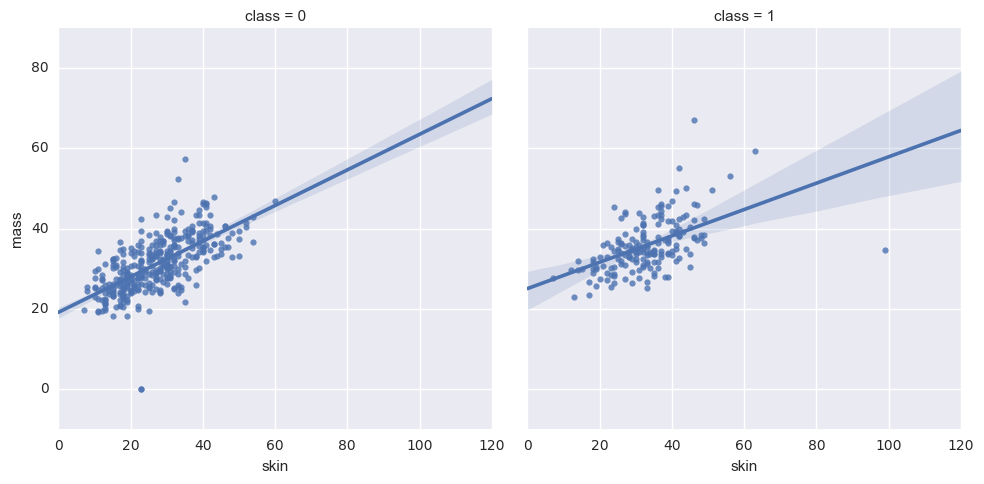

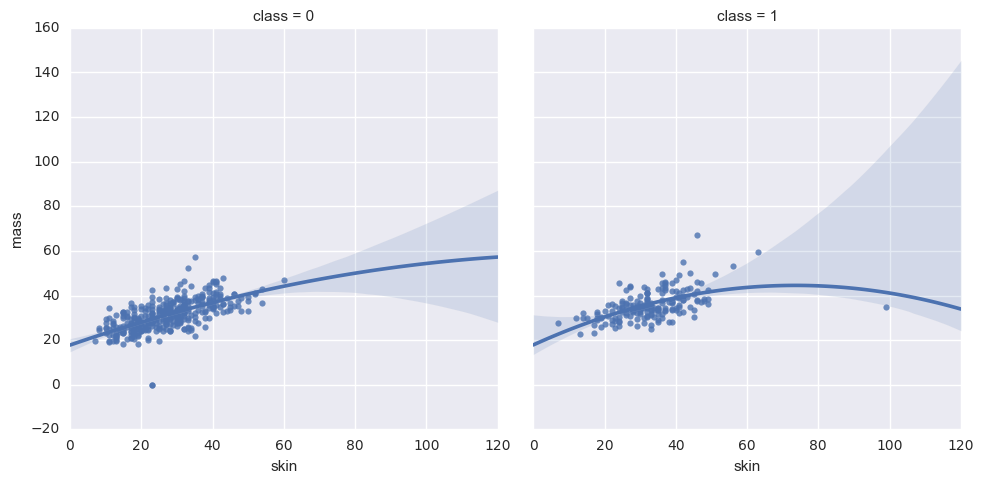

In [24]:
# does the skin vs mass relationship change for those diganoses with diabetes (class = 1)
fig12 = sns.lmplot(x="skin", y="mass", data=df[df['skin'] > 0], col="class", order=1);
fig13 = sns.lmplot(x="skin", y="mass", data=df[df['skin'] > 0], col="class", order=2);

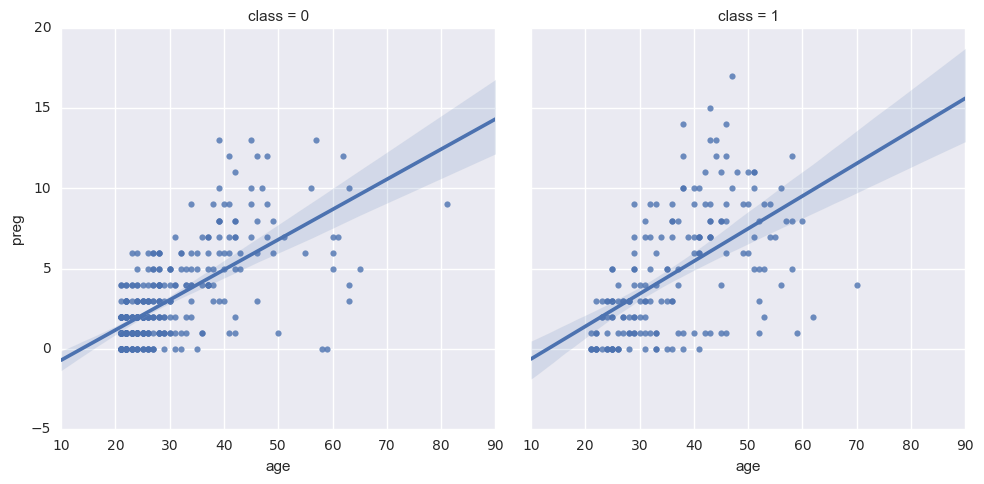

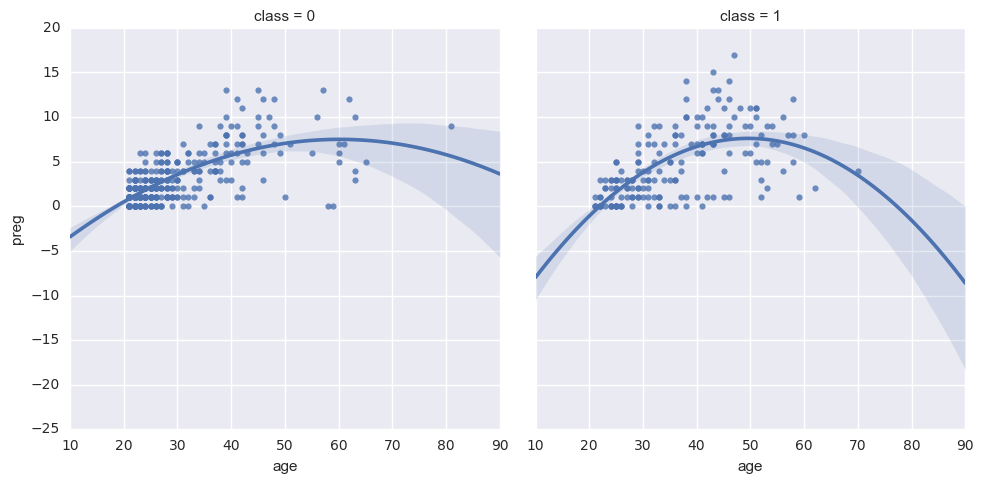

In [27]:
# does the age vs preg relationship change for those diganoses with diabetes (class = 1)
fig12 = sns.lmplot(x="age", y="preg", data=df[df['skin'] > 0], col="class", order=1);
fig13 = sns.lmplot(x="age", y="preg", data=df[df['skin'] > 0], col="class", order=2);